# Exercise 1 - Run your first experiment

Let's see how Azure ML can help track metrics from a simple experiment that uses Python code to examine some data.

In this case, you'll use a simple dataset that contains details of patients that have been tested for diabetes. You'll run an experiment to explore the data, extracting statistics, visualizations, and data samples. With the addition of a few lines, the code uses an Azure ML *experiment* to log details of the run.

In [1]:
import azureml.core
print("Ready to use Azure ML", azureml.core.VERSION)

Ready to use Azure ML 1.0.69


## Task 1: Load your Workspace from_config

In [2]:
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws.name, "loaded")

TestMLWS loaded


## Task 2: Run Experiment

Starting experiment: diabetes-experiment


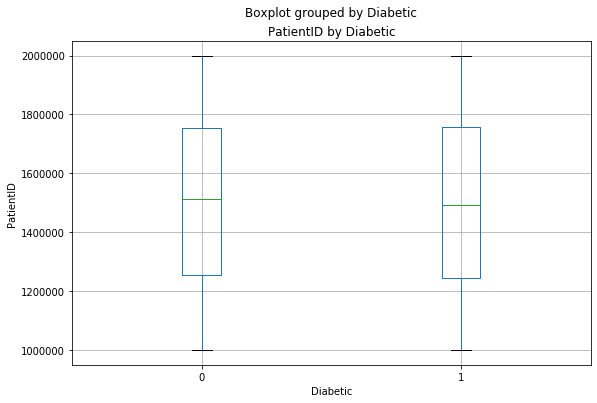

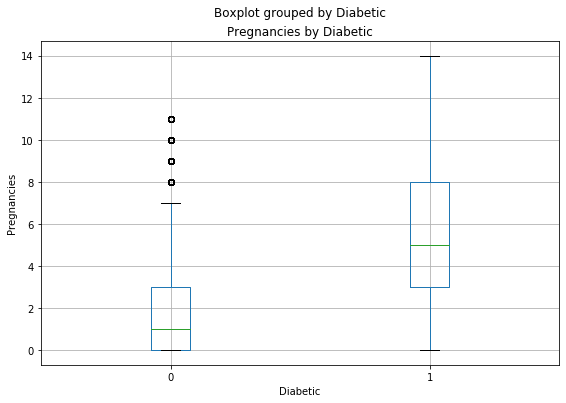

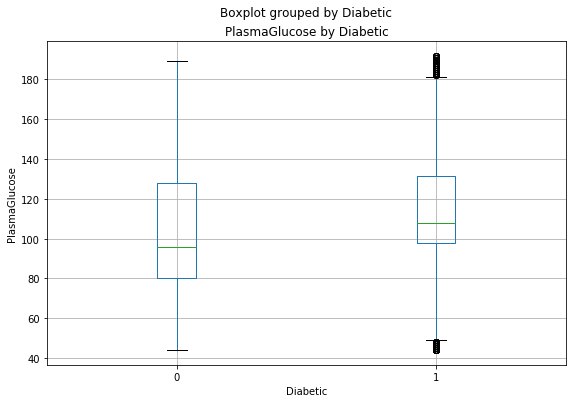

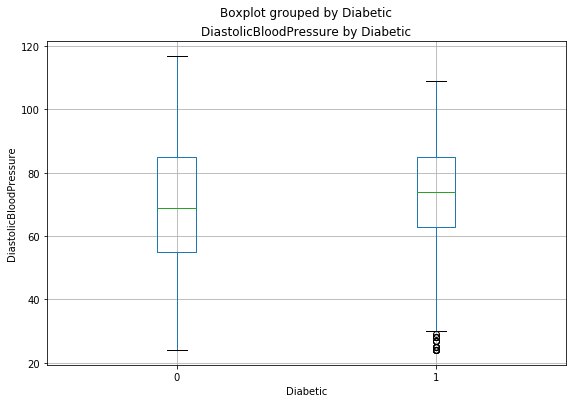

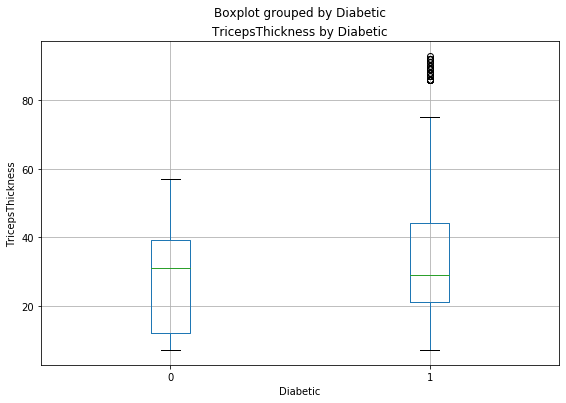

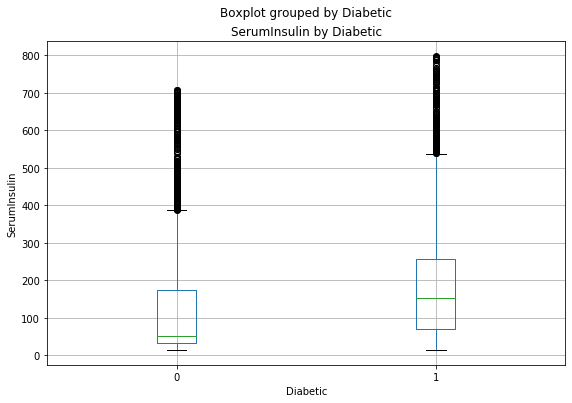

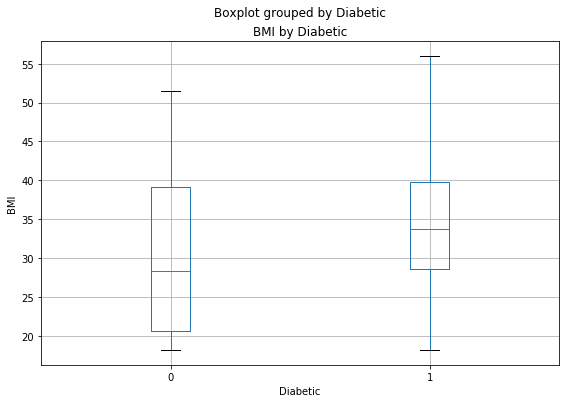

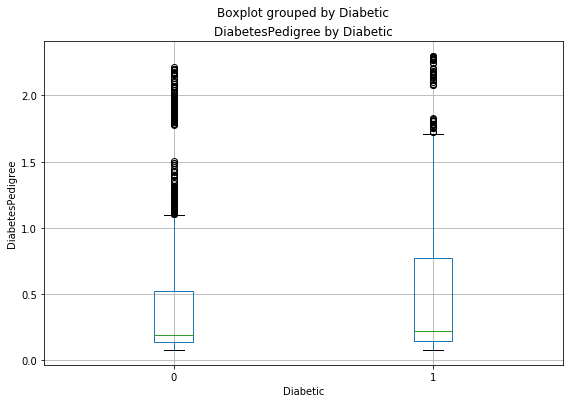

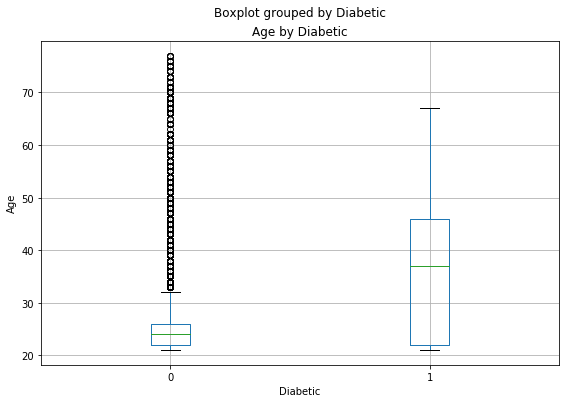

In [4]:
from azureml.core import Experiment, Run
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace = ws, name = "diabetes-experiment")
print("Starting experiment:", experiment.name)

# Start logging data from the experiment
run = experiment.start_logging()

# load the diabetes dataset
data = pd.read_csv('data/diabetes.csv')

# Count the rows and log the result
row_count = (len(data))
run.log("observations", row_count)

# Create box plots for each feature variable by the "diabetic" label and log them
num_cols = data.columns[:-1]
for col in num_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = col, by = "Diabetic", ax = ax)
    ax.set_title(col + ' by Diabetic')
    ax.set_ylabel(col)
    run.log_image(name = col, plot = fig)
plt.show()

# Create a list of mean diabetes pedigree per age and log it
mean_by_age = data[["Age", "DiabetesPedigree"]].groupby(["Age"]).mean().reset_index()
ages = mean_by_age["Age"].tolist()
pedigrees = mean_by_age["DiabetesPedigree"].tolist()
for index in range(len(ages)):
       run.log_row("Mean Diabetes Pedigree by Age", Age = ages[index],Diabetes_Pedigree = pedigrees[index])

# Save a sample of the data and upload it to the experiment output
data.sample(100).to_csv("sample.csv", index=False, header=True)
run.upload_file(name = 'outputs/sample.csv', path_or_stream = './sample.csv')

# Complete tracking and get link to details
run.complete()


## Task 3: View Experiment Results

After the experiment has been finished, you can view the results. Start by running the following cell:

In [5]:
run

Experiment,Id,Type,Status,Details Page,Docs Page
diabetes-experiment,640ba646-7df4-467c-8276-6f51f4ff2e47,,Running,Link to Azure Portal,Link to Documentation


*Don't worry if the status is still **Running**, it can take a while to update. Eventually it will be set to **Completed**.*

Note that the experiment has been assigned a unique ID, and the output includes a link to a details page in the Azure portal. Click this link to open a new browser tab and view the experiment run details, noting the following:

On the **Details** tab:

- The **Tracked Metrics** list includes the *observations* value (the number of records in the dataset), an image for each matplotlib plot that was generated, and a 
table for the mean diabetes pedigree by age.
- The *Mean Diabetes Pedigree by Age* table is plotted as a chart.
- Each matplotlib plot image is shown.

On the **Outputs** tab:

- The ouputs generated by the experiment are listed - including each of the plot images and a CSV file containing a sample of the data used in the experiment.

Clicking **Back to Experiment** shows a page for this experiment with a list of all previous runs (in this case, there's only been one). This enables you to track multiple runs of the same experiment so you can observe variations in the metrics produced based on parameters or random data variation.

The **Experiments** tab in your Azure ML Workspace lists all of the experiments that have been run in the workspace.

> **More Information**: To find out more about running experiments, see [this topic](https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-manage-runs) in the Azure ML documentation. For details of how to log metrics in a run, see [this topic](https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-track-experiments).